# CIS Class Activity 3
## Varshita Kolipaka
Roll Number - `2020113007`


Importing all the required libraries and modules from there. We can also use seaborn, it makes the graph easier to plot, and smoother, but we shall attempt to graph without using it.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
import statistics

### Part 1

#### Required:
1. Take $x(n)$ to be the position after n steps of a random walk. Calculate the probability of each such distance.

2. Evaluate $P(x(n)  = m)$ and $P(x(n) >m)$ (m is number of right walks).
#### Theory:
Take  𝑥(𝑛)  to be the position after n steps of a random walk.
We first generate a random walk 

total probablity : 1.0000000000000002


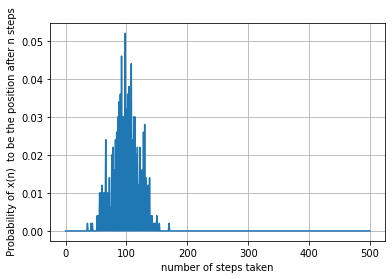

In [128]:
def random_walk(num_steps, x_start):
  
    random_number = np.random.randint(2, size=num_steps)
    steps_to_take = random_number * 2 - 1
    walk = x_start + np.cumsum(steps_to_take)
    return walk
k = 100
n=500
final_position = np.zeros(n+1)



for i in range(n):
    rw = random_walk(n, k)
    # increment frequency of that distance occuring. we take final index.
    final_position[rw[n-1]]+=1

# for each possible position in the final_position array, divide by n to check the fraction of times it has occurred
prob = final_position/(n)        

plt.plot(prob)
plt.xlabel("number of steps taken")
plt.ylabel(" Probability of x(n)  to be the position after n steps")
plt.grid()

print("total probablity : " + str(sum(prob)))

### Part 2

#### Theory:
We take probability of all distances greater than threshold, and sum them up.



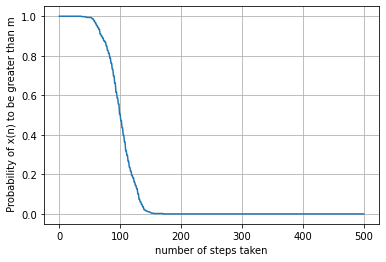

In [132]:
# for each possible position in the final_position array, divide by n to check the fraction of times it has occurred
final_prob = []
for i in range (len(prob)):
    # here prob[i] = no. pof times distance i occurs, prob[i+1] = num times i+1 distance occured, and so on.
    a = np.sum(prob[i:])
    final_prob.append(a)
plt.plot(final_prob)
plt.xlabel("number of steps taken")
plt.ylabel(" Probability of x(n) to be greater than m")
plt.grid()

### Part 3
Fitting using Gaussian vs Obtained Graph.
Orange curve is fitted

In [172]:
def something(x, first_p, second_p): 
    p1 = (first_p * np.sqrt(2 * np.pi)) 
    p2 = np.exp((-1/2) * np.power(((x-second_p)/first_p) , 2))
    output = 1/p1 * p2
    return output

Text(0, 0.5, 'P')

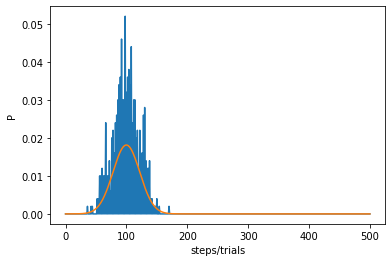

In [173]:
x = np.array(range(0,501))

m, _ = scipy.optimize.curve_fit(something , x,prob)
sd,mean  = m
plt.plot(prob)
plt.plot(x, norm.pdf(x, mean, sd))

plt.xlabel("steps/trials")
plt.ylabel("P")

